c:\Users\Adhesh Rajath\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


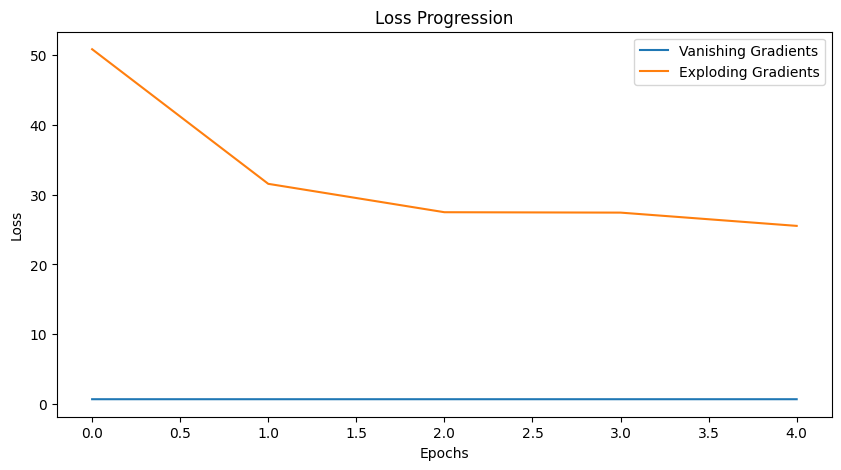

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Generate dummy data
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, size=(1000,))  # Binary labels

# Define a function to create a model
def create_model(weight_initializer):
    model = Sequential()
    model.add(Dense(128, activation='sigmoid', kernel_initializer=weight_initializer, input_dim=10))
    for _ in range(5):  # Add multiple layers to deepen the network
        model.add(Dense(128, activation='sigmoid', kernel_initializer=weight_initializer))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=weight_initializer))
    model.compile(optimizer='sgd', loss='binary_crossentropy')
    return model

# 1. Vanishing Gradients: Small weights
vanishing_model = create_model(weight_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01))

# 2. Exploding Gradients: Large weights
exploding_model = create_model(weight_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=10.0))

# Train both models for a few epochs
history_vanishing = vanishing_model.fit(X, y, epochs=5, batch_size=32, verbose=0)
history_exploding = exploding_model.fit(X, y, epochs=5, batch_size=32, verbose=0)

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(history_vanishing.history['loss'], label='Vanishing Gradients')
plt.plot(history_exploding.history['loss'], label='Exploding Gradients')
plt.title('Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
